<a href="https://colab.research.google.com/github/tbeucler/ml4rt/blob/master/notebooks_tbeucler/07_SGC_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import ticker

import pandas as pd
import numpy as np
import pickle as pkl
import json

from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.stats import binned_statistic

In [3]:
fz = 40
lw = 2
siz = 100

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['lines.linewidth'] = lw
plt.rc('font',size=fz)

# Schematic to showcase the added value of nonlinearity

In [4]:
# Generate 50 random numbers between 0 and 1
X = 3*np.random.rand(100)

# Generate noise that linearly increases with X
noise = np.random.normal(scale=X)

# Generate 50 random Y values following an exponential of X with noise
Y = np.exp(X) + noise

# Generate 10^4 points for true X and true Y
true_X = 3*np.random.rand(10000)
true_noise = np.random.normal(scale=true_X)
true_Y = np.exp(true_X) + true_noise

# Display X and Y
print("X:", X)
print("Y:", Y)

X: [2.80579064 0.30278692 1.21017917 2.2672006  0.99043615 1.10781598
 0.65426003 2.92147431 1.54868077 2.50345077 0.31775434 0.97880132
 0.29209001 2.916908   2.74175358 0.06752683 1.88263511 0.5064724
 2.00010486 2.15504402 1.38465918 2.22374462 2.41111444 2.64219375
 2.97100747 0.30381146 0.79575432 2.86681357 0.97109215 1.34227223
 0.25356909 2.21732121 2.70704694 0.16673777 0.52173984 1.71570373
 0.4109697  1.54859838 0.41008356 2.79079832 1.51180423 0.78489493
 1.86723226 1.1835098  2.36451736 0.25236046 1.2429535  1.82131832
 2.39459247 0.88815338 0.78082262 0.44868403 0.45890275 2.24424978
 0.93382013 0.48792791 2.39956959 2.02584492 0.50585252 1.45827701
 1.0398053  2.73822902 1.65124811 1.360368   1.16431414 2.61224285
 1.63896972 2.0804943  2.41275488 1.98839467 0.96047217 1.31077838
 2.19011953 2.04599701 1.47483135 1.10280705 2.94002776 1.33122195
 2.24109589 0.10435636 0.18350675 0.67830273 2.76180889 0.31054696
 2.1224303  2.67175001 2.53295557 0.22535847 0.48325448 2.72

<ipython-input-106-0098f52385b6>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(empty_string_labels)
<ipython-input-106-0098f52385b6>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(empty_string_labels)


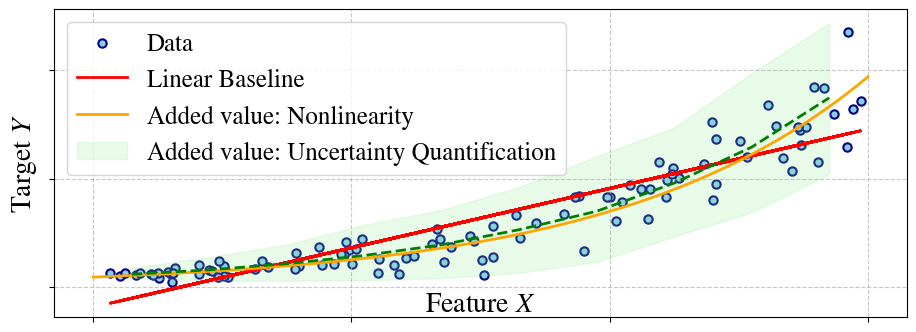

In [106]:
# Scatter plot
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
plt.scatter(X, Y, c='skyblue', edgecolors='navy', linewidth=1.5, label='Data')

# Linear regression
slope, intercept, _, _, _ = linregress(X, Y)
plt.plot(X, slope*X + intercept, color='red', label='Linear Baseline')

# Exponential regression
coefficients = np.polyfit(X, np.log(Y), 1)
X_exp = np.linspace(0,3,1000)
Y_exp = np.exp(coefficients[1]) * np.exp(coefficients[0]*X_exp)
plt.plot(X_exp, Y_exp, color='orange', label='Added value: Nonlinearity')

# # Plot the true Y as a function of true X
bin_means, bin_edges, _ = binned_statistic(true_X, true_Y, statistic='mean', bins=10)
# Adjust bin_edges to have the same length as bin_means for plotting
bin_edg = bin_edges[:-1] + np.diff(bin_edges) / 2
plt.plot(bin_edg, bin_means, linestyle = '--',
         color='green')

bin_conf_int = [np.percentile(true_Y[(true_X >= bin_edges[i]) & (true_X < bin_edges[i+1])], [1, 99]) for i in range(len(bin_means))]
plt.fill_between(bin_edg, [ci[0] for ci in bin_conf_int], [ci[1] for ci in bin_conf_int],
                 color='lightgreen', alpha=0.2, label='Added value: Uncertainty Quantification')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Set labels with latex font
plt.xlabel(r'Feature $X$', fontsize=20, labelpad=-25)  # Adjust labelpad value as needed
plt.ylabel(r'Target $Y$',fontsize=20)

# Set the number of ticks
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)

# Remove x and y tick labels
# x
labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels)
# y
labels = [item.get_text() for item in ax.get_yticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_yticklabels(empty_string_labels)

plt.legend(fontsize=18)
# Show plot
plt.show()

# Schematic to showcast the added value of temporal connectivity

In [53]:
# Define the time series duration and sampling rate
t = np.linspace(0, 1, 100)  # time vector

# Define the sinusoidal waves
fast_wave = 0.5*np.sin(2 * np.pi * 10 * t)  # fast wave with a frequency of 10 Hz
fq = 2+0.5*fast_wave
slow_wave = np.cos(2 * np.pi * fq * t)  # slow wave with a frequency that depends on the fast wave

# Generate normal (Gaussian) noise
noise = 1.5*np.random.normal(0, 0.2, t.shape)

# Superpose the waves and add noise
time_series = fast_wave + slow_wave + noise

# Baseline model based on the slow wave only and a fixed frequency of 2Hz
baseline_model = np.cos(2 * np.pi * 2 * t)

# Model using more points in the past
smarter_model = slow_wave + fast_wave

In [65]:
# Find the 3 closest points to the baseline model for t < 0.5
distances_baseline = np.abs(time_series[:50] - baseline_model[:50])
indices_baseline_close = np.argsort(distances_baseline)[:3]

# Find the 25 closest points to the smarter model for t < 0.5
distances_smarter = np.abs(time_series[:50] - smarter_model[:50])
indices_smarter_close = np.argsort(distances_smarter)[:25]

<ipython-input-113-41a53595425f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(empty_string_labels)
<ipython-input-113-41a53595425f>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(empty_string_labels)


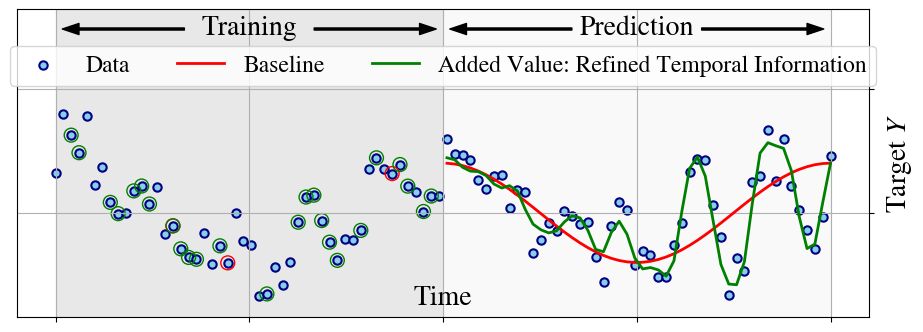

In [113]:
# Scatter plot
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)

# Apply different background colors for time before and after prediction (at t=0.5)
ax.axvspan(0, 0.5, color='lightgrey', alpha=0.5)
ax.axvspan(0.5, 1, color='whitesmoke', alpha=0.5)

plt.scatter(t, time_series, c='skyblue', edgecolors='navy', linewidth=1.5, label='Data')
# plt.plot(t[:50], baseline_model[:50], 'r-', linewidth=2, linestyle=':')
# plt.plot(t[:50], smarter_model[:50], 'g-', linewidth=2, linestyle=':')
plt.plot(t[50:], baseline_model[50:], 'r-', linewidth=2, label='Baseline')
plt.plot(t[50:], smarter_model[50:], 'g-', linewidth=2, label='Added Value: Refined Temporal Information')
plt.ylim((-2.1,4.1))

# Circle the 5 closest points to the baseline model with red for t<0.5
plt.scatter(t[indices_baseline_close], time_series[indices_baseline_close], s=100, facecolors='none', edgecolors='r')

# Circle the 15 closest points to the smarter model with green for t<0.5
plt.scatter(t[indices_smarter_close], time_series[indices_smarter_close], s=100, facecolors='none', edgecolors='g')

Y_text = 3.6
# Titles with arrows
ax.text(0.25, Y_text, 'Training', horizontalalignment='center', fontsize=20)
ax.text(0.75, Y_text, 'Prediction', horizontalalignment='center', fontsize=20)

Y_arrow = 3.7
# Adjusted Arrows for "Training"
ax.annotate('', xy=(0, Y_arrow), xytext=(0.175, Y_arrow),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))
ax.annotate('', xy=(0.5, Y_arrow), xytext=(0.325, Y_arrow),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))

# Adjusted Arrows for "Prediction"
ax.annotate('', xy=(0.5, Y_arrow), xytext=(0.675, Y_arrow),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))
ax.annotate('', xy=(1, Y_arrow), xytext=(0.825, Y_arrow),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))

plt.xlabel(r'Time',fontsize=20,labelpad=-30)

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.ylabel(r'Target $Y$',fontsize=20)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.92), fontsize=17,ncol=3)
plt.grid(True)

# x
labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels)
# y
labels = [item.get_text() for item in ax.get_yticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_yticklabels(empty_string_labels)

plt.show()

# Deterministic, AI-based, Medium-Range Weather Forecasting

In [ ]:
# Create a dictionary storing performance and number of parameters for each model
MWF = {}

In [ ]:
# Start with number of parameters
MWF['WeynCNN2019'] = 200e3
MWF['WeynCNN2020'] = 700e3
MWF['Rasp2020'] = 6.3e6
MWF['Keisler'] = 6.7e6
MWF['Pathak'] = 75e6
MWF['GraphCast'] = 37e6
MWF['Pangu'] = 256e6